In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

def fun_PCAnew (sheetname, exrate):
    xls = pd.read_excel("C:\\Users\\USER\\Desktop\\Данные для курсовой\\Финальные расчеты\\usrus.xlsx",
                        na_values="Missing", sheet_name=sheetname)
    
    yc = xls.values
    
    yc_std = StandardScaler().fit_transform(yc)
    
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(yc_std)
    principal = pd.DataFrame(data=principalComponents, 
                          columns = ['PC 1', 'PC 2', 'PC 3'])
    
    exchrate = pd.read_excel('C:\\Users\\USER\\Desktop\\Данные для курсовой\\Финальные расчеты\\usrus_exrate.xlsx', 
                             na_values="Missing", sheet_name=exrate)
    pcacomb = pd.concat([principal, exchrate], axis=1)
    corr_matrix = pcacomb.corr()
    corr_matrix1 = corr_matrix.stack().reset_index()
    corr_matrix1.columns = ['a', 'b', 'c']
    
    corr_matrix1mod = corr_matrix1.drop([0,1,2,4,5,6,8,9,10,12,13,14,15])
    corr_matrix1mod.reset_index(drop=True, inplace=True)
    corr_matrix1mod.set_index('a', 'b', 'c')
    corr_matrix1modnew = corr_matrix1mod.drop(['b'], axis=1)
    corr_matrix1modnew_1 = corr_matrix1modnew.rename(columns={'a':'Component', 'c':'Value'})
    corr_matrix1modnew_1['Year']= sheetname
    return corr_matrix1modnew_1

In [2]:
c = fun_PCAnew('2003', '2003')
c

,Component,Value,Year
0,PC 1,0.097822,2003
1,PC 2,0.086135,2003
2,PC 3,0.008860,2003


In [3]:
d = fun_PCAnew('2004', '2004')
d

,Component,Value,Year
0,PC 1,-0.078007,2004
1,PC 2,0.038208,2004
2,PC 3,-0.070758,2004


In [4]:
e = fun_PCAnew('2005', '2005')
e

,Component,Value,Year
0,PC 1,-0.070668,2005
1,PC 2,0.103822,2005
2,PC 3,-0.016546,2005


In [5]:
f = fun_PCAnew('2006', '2006')
f

,Component,Value,Year
0,PC 1,-0.044254,2006
1,PC 2,0.089579,2006
2,PC 3,-0.046040,2006


In [6]:
g = fun_PCAnew('2007', '2007')
g

,Component,Value,Year
0,PC 1,0.011124,2007
1,PC 2,-0.148093,2007
2,PC 3,-0.040159,2007


In [7]:
h = fun_PCAnew('2008', '2008')
h

,Component,Value,Year
0,PC 1,-0.053181,2008
1,PC 2,-0.004472,2008
2,PC 3,0.035454,2008


In [8]:
i = fun_PCAnew('2009', '2009')
i

,Component,Value,Year
0,PC 1,0.042342,2009
1,PC 2,-0.005267,2009
2,PC 3,0.030013,2009


In [9]:
j = fun_PCAnew('2010', '2010')
j

,Component,Value,Year
0,PC 1,-0.065530,2010
1,PC 2,-0.142253,2010
2,PC 3,-0.076434,2010


In [10]:
k = fun_PCAnew('2011', '2011')
k

,Component,Value,Year
0,PC 1,0.013607,2011
1,PC 2,0.004124,2011
2,PC 3,0.076983,2011


In [11]:
l = fun_PCAnew('2012', '2012')
l

,Component,Value,Year
0,PC 1,-0.106157,2012
1,PC 2,-0.007296,2012
2,PC 3,0.005585,2012


In [12]:
m = fun_PCAnew('2013', '2013')
m

,Component,Value,Year
0,PC 1,0.082663,2013
1,PC 2,0.052504,2013
2,PC 3,0.044911,2013


In [13]:
n = fun_PCAnew('2014', '2014')
n

,Component,Value,Year
0,PC 1,-0.072398,2014
1,PC 2,0.045656,2014
2,PC 3,0.158600,2014


In [14]:
o = fun_PCAnew('2015', '2015')
o

,Component,Value,Year
0,PC 1,0.007254,2015
1,PC 2,-0.088395,2015
2,PC 3,0.041603,2015


In [15]:
p = fun_PCAnew('2016', '2016')
p

,Component,Value,Year
0,PC 1,-0.054106,2016
1,PC 2,0.145035,2016
2,PC 3,-0.116063,2016


In [16]:
q = fun_PCAnew('2017', '2017')
q

,Component,Value,Year
0,PC 1,0.081470,2017
1,PC 2,0.067872,2017
2,PC 3,-0.181718,2017


In [17]:
r = fun_PCAnew('2018', '2018')
r

,Component,Value,Year
0,PC 1,-0.071331,2018
1,PC 2,0.091385,2018
2,PC 3,-0.129621,2018


In [18]:
s = fun_PCAnew('2019', '2019')
s

,Component,Value,Year
0,PC 1,0.108082,2019
1,PC 2,-0.114657,2019
2,PC 3,-0.025632,2019


In [19]:
t = fun_PCAnew('2020', '2020')
t

,Component,Value,Year
0,PC 1,0.016561,2020
1,PC 2,-0.198128,2020
2,PC 3,0.290470,2020


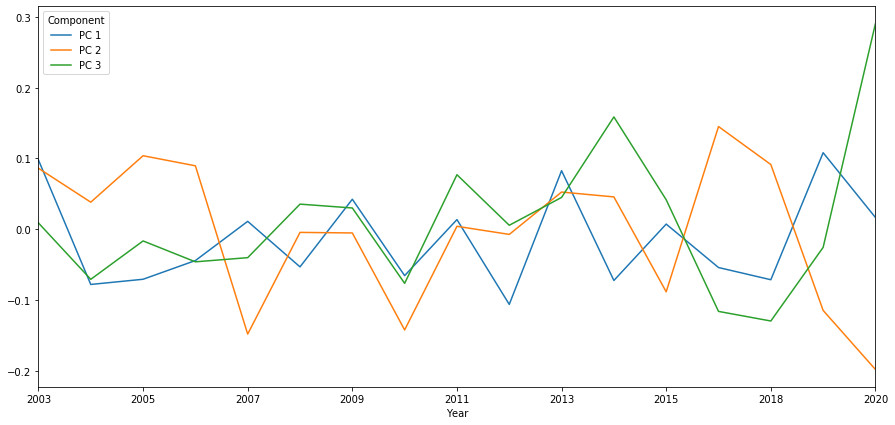

In [20]:
merged = pd.concat([c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t])
merged.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
pd.pivot_table(merged, values='Value', index=['Year'], columns=['Component']).plot(ax=ax)
plt.savefig('Russia vs US')